# Bike Sharing Data Analysis and Prediction

# Exploratory Data Analysis

## Data Information 

- datetime - hourly date + timestamp 
- season: 
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather: 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Target Variable)

In [1]:
## load packages
import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

import seaborn as sns

import pylab as plot

from scipy import stats
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

## Hypothesis Generation 

**Time** - Time of day will be very important, I expect there will be higher number of rentals just before and just after the work day, There may also be an increase during lunch hour <br>
**Season** - It would make sense that the better the weather the more people who will be cycling, thus I would expect to see a higher number of rentals in summer than winter <br>
**Holiday** - Hard to tell, could see a drop as less people are working and thus less people will be travelling too and from work/ education etc. However public transport could be reduced on holidays which would mean some people who wouldnt usually use the rental service to rely on it for the day <br>
**Work Day** This will be very telling as if we see an increase we will see people use the bikes as a practical alternative to to other modes of transport, If we see a decrease we might assume that people use the bike leisurely and less so for practicality, however I would expect to see an increase in usage <br>
**Weather** I assume this will be one of the most important features as people would be much more likely to partake if the weather is nice.


In [2]:
## importing data sets
#Importing the dataset
train = pd.read_csv(r'C:\Users\johnl\Documents\Bike Sharing Demand\train.csv')
test = pd.read_csv(r'C:\Users\johnl\Documents\Bike Sharing Demand\test.csv')
df = train.append(test, sort = False)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


### Missing Data

In [3]:
df.shape
df.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

Our test data excludes the catagories for casual, registered and count , besides this we have no null values

### Types of Data

**Categorical** - Season, Holiday, Working day, Weather <br>
**Timeseries** - Datetime  <br>
**Numerical** - Temp, aTemp, Humidity, Windspeed, Casual, Registered, Count  <br>

Note: In mathematics, a time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data

In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,36.021955,155.552177,191.574132
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot of Count')

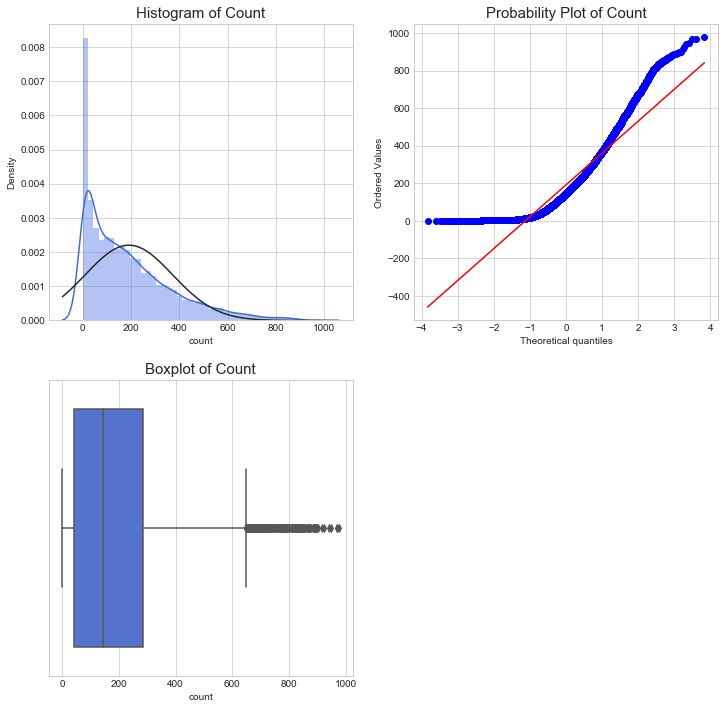

In [5]:
fig1=plt.figure(figsize=(12,12))
ax1=fig1.add_subplot(221)
(mu, sigma) =stats.norm.fit(train['count'])
sns.distplot(train['count'], fit = stats.norm,color = 'royalblue', ax = ax1)
ax1.set_title('Histogram of Count',size=15)

ax2=fig1.add_subplot(222)
stats.probplot(train['count'], plot = ax2)
ax2.set_title('Probability Plot of Count',size=15)
ax3=fig1.add_subplot(223)
sns.boxplot(x = 'count', data = train, color = 'royalblue', ax = ax3)
ax3.set_title('Boxplot of Count',size=15)






In [6]:
print("Skewness: " + str(train['count'].skew()))
print("Kurtosis: " + str(train['count'].kurt()))

Skewness: 1.2420662117180776
Kurtosis: 1.3000929518398334


#### What do these values mean?
##### Rules of Thumb for Skewness
1. If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
2. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
3. If the skewness is less than -1 or greater than 1, the data are highly skewed

As our value is 1.17 we see the data has a high positive skew

##### What is Kurtosis?
- The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution.
- Kurtosis is all about the tails of the distribution – not the peakedness or flatness.  It measures the tail-heaviness of the distribution.

Kurtosis is usually measured against the normal distribution.  
- If the kurtosis is close to 0, then a normal distribution is often assumed.  These are called mesokurtic distributions.
- If the kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution.  
- If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010). George, D., & Mallery, M. (2010).

### Analysis of Target



We can make several observations from the above plots
- Our data is not normally distributed 
- Our skewness (1.24) indicates a high positive (right) skew
- As our Kurtosis value is greater than zero our data has heavier tails and is called a leptokurtic distribution
- There are multiple outliers in our data

### Investigation of outliers


In [7]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

#### Identifcation of Outliers
I will be using the 1.5 IQR rule for my classification of outliers <br>
The method for the 1.5 interquartile range (IQR) rule is as follows:
1. Calculate the interquartile range for the data.
2. Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
3. Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
4. Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

In [8]:
Q1 = train["count"].quantile(.25)
Q3 = train["count"].quantile(.75)
IRQ = Q3 - Q1
IRQ_rule = 1.5 * IRQ
#print(IRQ_rule)
#print(Q3+ IRQ_rule)
outliers = train[(train['count'] < (Q1 - IRQ_rule)) | (train['count'] > (Q3 + IRQ_rule))]
#print(len(outliers))
outlier_percent = (len(outliers)/len(df))*100
#print(outlier_percent)

Our IRQ value is: 242 <br>
1.5 times our IRQ is 363 <br>
Our lower bound is -321.0 <br>
Our upper bound is 647.0 <br>
Number of outliers is 300 <br>
This equates to 1.72 % of our values being outliers

As the lower bound is negative and we cant have a negative amount of bikes being rented (unless 321 bikes were stolen in a day ) we can disgard our lower bound <br>
For now we will consider an outlier any time over 647 bikes were rented

In [9]:

#removing outliers
cond = df['count'].isin(outliers['count'])
df.drop(df[cond].index, inplace = True)
df.shape

(17079, 12)

### Average Count by Season

No handles with labels found to put in legend.


[Text(0, 0, 'Spring'),
 Text(0, 0, ',Summer'),
 Text(0, 0, 'Fall'),
 Text(0, 0, 'Winter')]

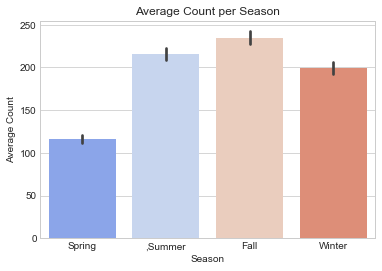

In [10]:
ax =sns.barplot(x = 'season', y = 'count', data = train, estimator = np.average, palette='coolwarm')
plt.ylabel('Average Count')
plt.xlabel('Season')
plt.title("Average Count per Season")
plt.legend()
ax.set_xticklabels(labels = ["Spring",",Summer","Fall","Winter"])

Suprisingly Spring has by far the lowest Average Count, I need to investigate the weather per season

### Average Count by holiday

No handles with labels found to put in legend.


[Text(0, 0, 'Non Holiday'), Text(0, 0, ',Holiday')]

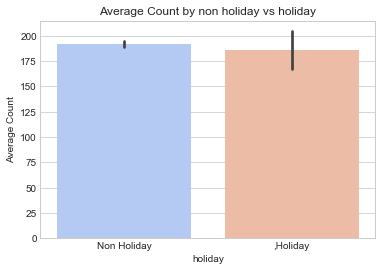

In [11]:
ax =sns.barplot(x = 'holiday', y = 'count', data = train, estimator = np.average, palette='coolwarm')
plt.ylabel('Average Count')
plt.xlabel('holiday')
plt.title("Average Count by non holiday vs holiday")
plt.legend()
ax.set_xticklabels(labels = ["Non Holiday",",Holiday"])

Slightly higher on non holiday days which follows our line of thinking

### Average Count by Workingday

No handles with labels found to put in legend.


[Text(0, 0, 'Non Workingday'), Text(0, 0, ',Workingday')]

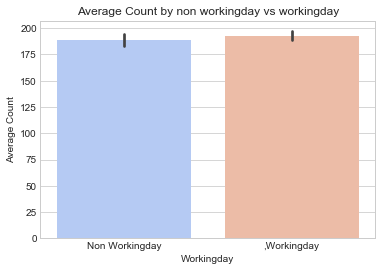

In [12]:
ax =sns.barplot(x = 'workingday', y = 'count', data = train, estimator = np.average, palette='coolwarm')
plt.ylabel('Average Count')
plt.xlabel('Workingday')
plt.title("Average Count by non workingday vs workingday")
plt.legend()
ax.set_xticklabels(labels = ["Non Workingday",",Workingday"])

Higher on working days which suggests people use them as an alternative to public transport to get to work perhaps

### Average Count per Weather group

No handles with labels found to put in legend.


[Text(0, 0, '1: Clear'),
 Text(0, 0, '2: Mist'),
 Text(0, 0, '3: Light Rain'),
 Text(0, 0, '4: Heavy Rain')]

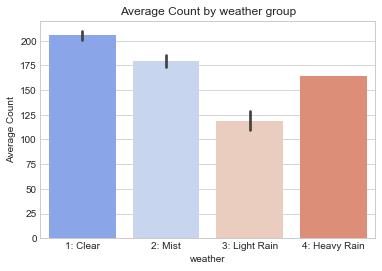

In [13]:
ax =sns.barplot(x = 'weather', y = 'count', data = train, estimator = np.average, palette='coolwarm')
plt.ylabel('Average Count')
plt.xlabel('weather')
plt.title("Average Count by weather group")
plt.legend()
ax.set_xticklabels(labels = ["1: Clear","2: Mist", "3: Light Rain", "4: Heavy Rain"])


As expected, better weather seems to have a higher count, Supringly catagory 4 breaks this trend, this is due to a tiny number of samples with cat 4 so its not an accurate representation, we might look at excluding these rows

## Correlation Matrix


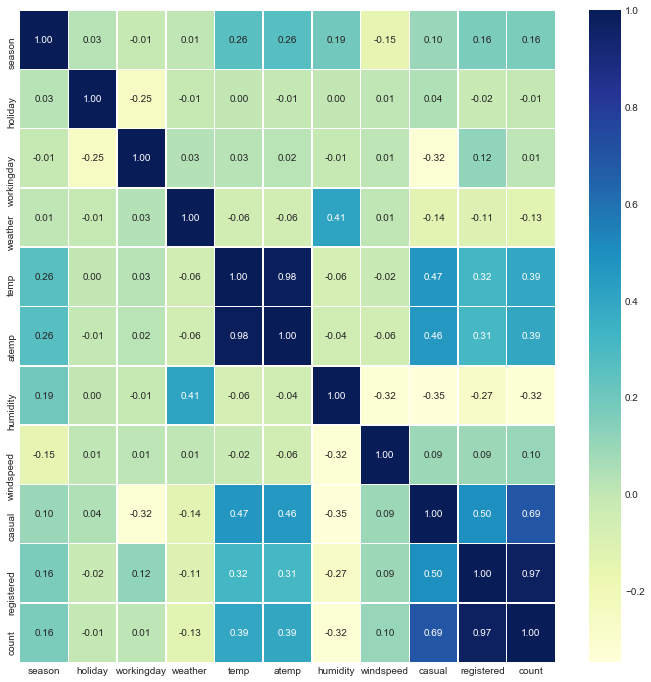

In [14]:
corrmat = train.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()


- temp and humidity features have got positive and negative correlation with count respectively.Although the correlation between them are not very prominent.
- windspeed is not going to be very helpful which is shown by its very weak correlation with count.
- atemp and temp have an extremely high correlation. During model building one of these variables has to be dropped since they will exhibit multicollinearity in the data.
- "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.

# Feature Engineering

- Create new columns "date,"hour","weekday","month" from "datetime" column.
- Change the datatype of "season","holiday","workingday" and weather to category.
- Drop the datetime column.

In [15]:
#df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
#df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
#                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", 
#                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", 
#                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
#df["workingday"] = df.workingday.map({0: "Non-workingday", 1: "workingday"})
#df["holiday"] = df.holiday.map({0: "Non-holiday", 1: "holiday"})

## Split datetime

Instead of a singular str variable we can split this up and form my usuable features

In [16]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].apply(lambda x:x.hour)
df['month'] = df['datetime'].apply(lambda x:x.month)
df['day of week'] = df['datetime'].apply(lambda x:x.dayofweek)
df['year'] = df['datetime'].apply(lambda x: x.year)

## Weather vs Month

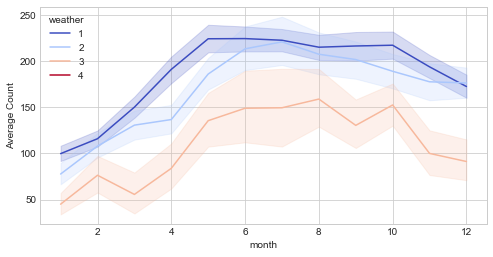

In [17]:
plt.figure(figsize = (8,4))
sns.lineplot(x = 'month', y = 'count', data = df, estimator = np.average, hue = 'weather', palette = 'coolwarm')
plt.ylabel('Average Count')
plt.show()

The better the weather the higher the average count regardless of the month, month is still important as month will usually dictate the weather

## Hour by hour workingday vs non workingday

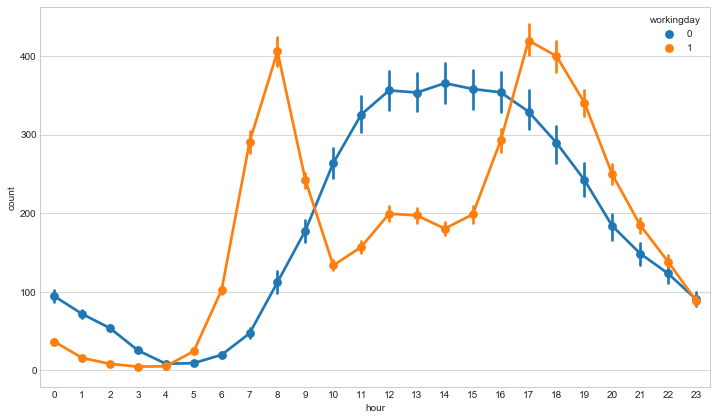

In [18]:
fig, axes = plt.subplots(figsize = (12,7))
sns.pointplot(x = 'hour', y = 'count', data = df, estimator = np.average, hue = 'workingday')
#sns.pointplot(x = 'Hour', y = 'count', data = data, estimator = np.average, hue = 'holiday', ax = axes[1], palette = 'muted')


**Workday**<br>
Follows our general hypothesis from earlier that on workingdays usage will peak before and after work, with two distinct peaks at around 7-8 am and 5-6 pm which follows the general 9-5 work day precisely. There is also a very slightly increase in usage around breaktime also.<br>
**Non Workday**<br>
There is a fairly normal distribution of usage which starts off low and gradually climbs throughout the early afternoon and then gradually declines again in the evening.

## Hour by hour holiday vs non holiday

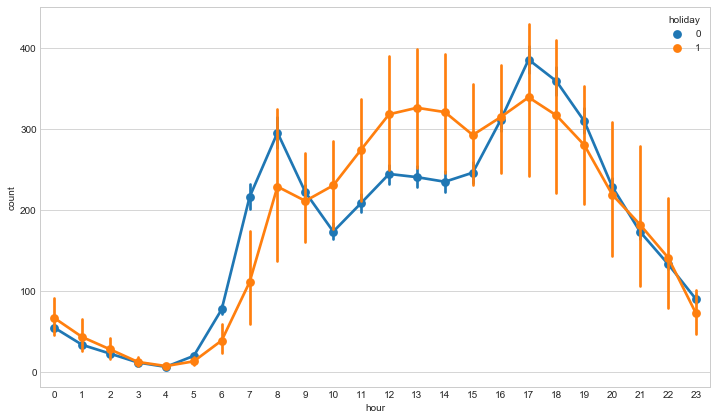

In [19]:
fig, axes = plt.subplots(figsize = (12,7))
sns.pointplot(x = 'hour', y = 'count', data = df, estimator = np.average, hue = 'holiday')

There is higher demand on working days around rush hour, towards the early morning and late night both holiday and non holiday days follow basically the same path. Holidays have higher usage in the early afternoon (presumably because otherwise people would be in work) This plot supports what we would otherwise assume

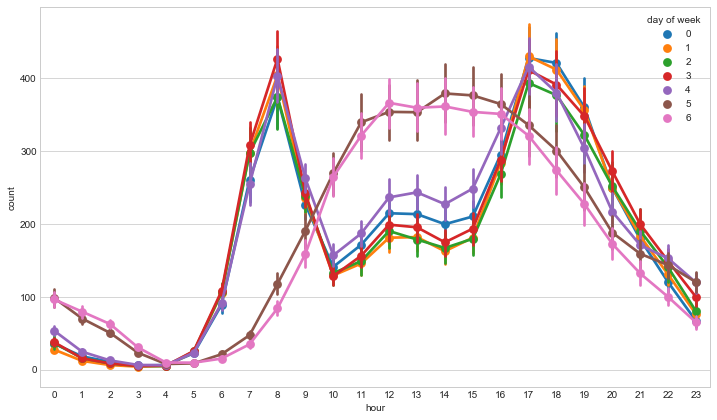

In [20]:
plt.figure(figsize = (12,7))
sns.pointplot(x = 'hour', y = 'count', data = df, estimator=np.average, hue = 'day of week')

There is a very obvious split between weekdays and week ends with weekdays and weekends both following the workingday vs non workingday pattern closely

## Difference between Registered and Casual Usage

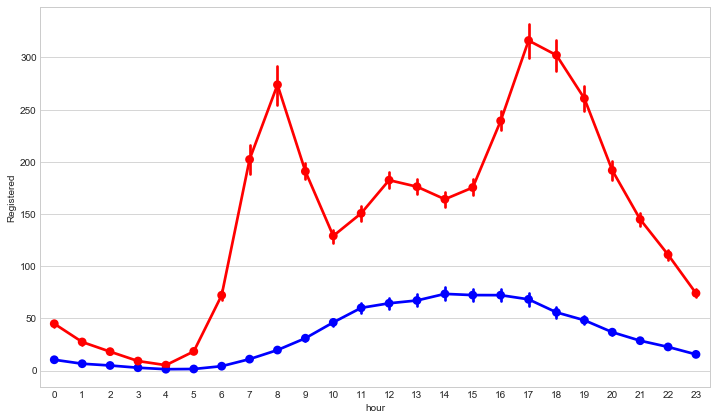

In [21]:
plt.figure(figsize = (12,7))
sns.pointplot(x = 'hour', y = 'casual', data = df, estimator = np.average, color = 'blue')
sns.pointplot(x = 'hour', y = 'registered', data = df, estimator = np.average, color = 'red')
plt.ylabel('Registered')
plt.show()

It is clear the registered users use the bikes as transportation to work while casual users follow the non weekday trend

### Converting to Catagory Type

In [22]:
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'day of week', 'month',"year", 'hour']

for feature in categorical_features:
    df[feature] = df[feature].astype("category")

### Seperate training and test data

In [23]:
train = df[pd.notnull(df['count'])]
test = df[~pd.notnull(df['count'])]
y = train['count']

### Dropping unneeded cols

In [24]:
drop_features = ['count', 'casual', 'registered', 'datetime', 'datetime', 'windspeed', 'month']

X_train = train.drop(drop_features, axis=1)
X_test = test.drop(drop_features, axis=1)

# Model

### Evaluation score(RMSLE) function

In [45]:
def rmsle(y_true, y_pred, convertExp=True):
    # Apply exponential transformation function
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # Convert missing value to zero after log transformation
    log_true = np.nan_to_num(np.array([np.log(y+1) for y in y_true]))
    log_pred = np.nan_to_num(np.array([np.log(y+1) for y in y_pred]))
    
    # Compute RMSLE
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

### Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression

# Step 1: Create Model
linear_reg_model = LinearRegression()

# Step 2: Train Model
log_y = np.log1p(y)  # Log Transformation of Target Value y
linear_reg_model.fit(X_train, log_y) 

# Step 3 : Predict
prediction = linear_reg_model.predict(X_train)

# Step 4 : Evaluate

print ('Linear Regression RMSLE:', rmsle(log_y, prediction,True))



Linear Regression RMSLE: 0.9711809476126146


### Ridge Model

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Step 1: Create Model
ridge_model = Ridge()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
ridge_params = {'max_iter':[5000], 'alpha':[0.001,0.01,0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# Evaluate Function for Cross-Validation (RMSLE score)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False) 
# Create GridSearchCV Object (with Ridge)
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid=ridge_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

# Step 2-2 : Perform Grid Search
log_y = np.log1p(y) # Log Transformation of Target Value y
gridsearch_ridge_model.fit(X_train, log_y) # Train (Grid Search)

print('Best Parameter:', gridsearch_ridge_model.best_params_)

# Step 3 : Predict
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# Step 4 : Evaluate
print('Ridge Regression RMSLE:', rmsle(log_y, preds,True))


Best Parameter: {'alpha': 0.001, 'max_iter': 5000}
Ridge Regression RMSLE: 0.9711809473812041


### Lasso Model

In [28]:
from sklearn.linear_model import Lasso

In [48]:


# Step 1: Create Model
lasso_model = Lasso()

# Step 2-1 : Create GridSearchCV Object
# Hyper-parameter List
lasso_params = {'max_iter':[5000], 'alpha':[0.0001,0.001,0.01,0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# Evaluate Function for Cross-Validation (RMSLE score)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False) 
# Create GridSearchCV Object (with Ridge)
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=10)

# Step 2-2 : Perform Grid Search
log_y = np.log1p(y) # Log Transformation of Target Value y
gridsearch_lasso_model.fit(X_train, log_y) # Train (Grid Search)

print('Best Parameter:', gridsearch_lasso_model.best_params_)

# Step 3 : Predict
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# Step 4 : Evaluate
print('Lasso Regression RMSLE:', rmsle(log_y, preds,True))

Best Parameter: {'alpha': 0.0001, 'max_iter': 5000}
Lasso Regression RMSLE: 0.9711794860969998


### Random Forest Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor()
rf_params = {'random_state':[42], 'n_estimators':[100,140,160]}
# Create GridSearchCV Object (with Random Forest Regression)
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)

# Step 2-2 : Perform Grid Search
log_y = np.log1p(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('Best Parameter:', gridsearch_random_forest_model.best_params_)

preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

print('Random Forest Regression RMSLE:', rmsle(log_y, preds,True))


Best Parameter: {'n_estimators': 160, 'random_state': 42}
Random Forest Regression RMSLE: 0.10698631323182131
